# Welcome to my Richter's Predictor Nepal Earthquake Damage Predictor Model!

Default code from Kaggle Notebook:

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



## Displaying some important libraries:

In [9]:
# import tensorflow as tf
# print("Tensorflow:", tf.__version__)

# import kerastuner as kt
# print("kerastuner:", kt.__version__)

# import keras_tuner as kt2
# print("keras_tuner:", kt2.__version__)

# import platform
# print("Python:", platform.python_version())

# import numpy as np
# print("numpy:", np.__version__)

# import pandas as pd
# print("pandas:", pd.__version__)

# import sklearn
# print("sklearn version:", sklearn.__version__)

# import sklearn
# print("sklearn path:", sklearn.__path__)

# import matplotlib
# print("matplotlib:", matplotlib.__version__)

# import seaborn as sns
# print("seaborn:", sns.__version__)

# # WARNING:tensorflow:From c:\Users\Micha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.

# # Tensorflow: 2.15.0
# # C:\Users\Micha\AppData\Local\Temp\ipykernel_6936\1753711907.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
# #   import kerastuner as kt
# # kerastuner: 1.0.5
# # keras_tuner: 1.3.5
# # Python: 3.10.11
# # numpy: 1.24.3
# # pandas: 2.1.4
# # sklearn version: 1.2.2
# # sklearn path: ['c:\\Users\\Micha\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\sklearn']
# # matplotlib: 3.8.2
# # seaborn: 0.13.0


## Set Global random seed to make sure we can replicate any model that we create (no randomness)

In [10]:
import random
import tensorflow as tf
import numpy as np
import os



np.random.seed(42)
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

os.environ['TF_DETERMINISTIC_OPS'] = '1'

### Loading the training and testing data

train_values are the features (X), and train_labels is the target/label (Y)

In [11]:
train_X = pd.read_csv("train_values.csv")
train_Y = pd.read_csv("train_labels.csv")

test_values = pd.read_csv("test_values.csv")

# print("train labels:\n", train_Y.head())

# print("train values:\n", train_X.head())
      
# print("test_values:\n", test_values.head())

## I want to find out which features to use since there are so many. Here are some common data science techniques:

1. **Correlation Matrix with Heatmap**: Correlation states how the features are related to each other or the target variable. You can use a heatmap to visualize the correlation matrix.

2. **Univariate Selection**: Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the `SelectKBest` class that can be used with a suite of different statistical tests to select a specific number of features.

3. **Recursive Feature Elimination (RFE)**: RFE is a popular feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

4. **Feature Importance**: You can get the feature importance of each feature of your dataset by using the feature importance property of the model. For example, Decision Trees models in the scikit-learn library offer an importance property that can be accessed directly.

For categorical features, you can convert them into numerical values using techniques like One-Hot Encoding or Label Encoding before applying these feature selection techniques. 

## First, I will try RFE (Recursive Feature Elimination)

In [12]:
# from sklearn.feature_selection import RFE
# from lightgbm import LGBMRegressor #Lightgbm is a great gradient boosting model for large amount of data

# # Assuming X is your feature set and y is the target value
# X = train_X.drop('building_id', axis=1)
# X = pd.get_dummies(X)

# y = train_Y.drop('building_id', axis=1)
# y = np.ravel(y) # converting dataframe to a one-dimensional array using the ravel function from numpy

# estimator = LGBMRegressor(verbose = 0, random_state = 42)  # It's best to find the best model for you
# selector = RFE(estimator, step=1)
# selector = selector.fit(X, y)

# # Assuming 'X' is your DataFrame with the feature data
# feature_names = X.columns

# # Map the feature names to the support array, which tells you which features were selected
# support_dict = dict(zip(feature_names, selector.support_))

# # Get the selected features
# selected_features = [feature for feature, support in support_dict.items() if support]

# # Print the selected features
# print("Selected features:\n", selected_features)

# # ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
# # 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
# # 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
# # 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 
# # 'land_surface_condition_n', 'land_surface_condition_o', 'foundation_type_h', 'foundation_type_r', 'foundation_type_u', 'roof_type_n', 
# # 'roof_type_q', 'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_v', 'ground_floor_type_x', 'other_floor_type_q', 'position_s',
# # 'plan_configuration_u']







# # The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. 
# # Selected features are assigned rank 1.
# # Map the feature names to the ranking array
# ranking_dict = dict(zip(feature_names, selector.ranking_))
# print(ranking_dict)


# # [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2 18 10 31
# #  27 33 28 25 30  6  1  1  3  1  8  1  1  5  1  1  1  1 34  1  1 16  9  1
# #  23  7  4 14  1 29 15 20 17 35 32 24 21 13 26  1 11 22 12 19]


# # {'geo_level_1_id': 1, 'geo_level_2_id': 1, 'geo_level_3_id': 1, 'count_floors_pre_eq': 1, 'age': 1, 'area_percentage': 1, 
# #  'height_percentage': 1, 'has_superstructure_adobe_mud': 1, 'has_superstructure_mud_mortar_stone': 1, 'has_superstructure_stone_flag': 1, 
# #  'has_superstructure_cement_mortar_stone': 1, 'has_superstructure_mud_mortar_brick': 1, 'has_superstructure_cement_mortar_brick': 1, 
# #  'has_superstructure_timber': 1, 'has_superstructure_bamboo': 1, 'has_superstructure_rc_non_engineered': 1, 'has_superstructure_rc_engineered': 1, 
# #  'has_superstructure_other': 1, 'count_families': 1, 'has_secondary_use': 1, 'has_secondary_use_agriculture': 2, 'has_secondary_use_hotel': 18, 
# #  'has_secondary_use_rental': 10, 'has_secondary_use_institution': 31, 'has_secondary_use_school': 27, 'has_secondary_use_industry': 33, 
# #  'has_secondary_use_health_post': 28, 'has_secondary_use_gov_office': 25, 'has_secondary_use_use_police': 30, 'has_secondary_use_other': 6, 
# #  'land_surface_condition_n': 1, 'land_surface_condition_o': 1, 'land_surface_condition_t': 3, 'foundation_type_h': 1, 'foundation_type_i': 8, 
# #  'foundation_type_r': 1, 'foundation_type_u': 1, 'foundation_type_w': 5, 'roof_type_n': 1, 'roof_type_q': 1, 'roof_type_x': 1, 
# #  'ground_floor_type_f': 1, 'ground_floor_type_m': 34, 'ground_floor_type_v': 1, 'ground_floor_type_x': 1, 'ground_floor_type_z': 16, 
# #  'other_floor_type_j': 9, 'other_floor_type_q': 1, 'other_floor_type_s': 23, 'other_floor_type_x': 7, 'position_j': 4, 'position_o': 14, 
# #  'position_s': 1, 'position_t': 29, 'plan_configuration_a': 15, 'plan_configuration_c': 20, 'plan_configuration_d': 17, 'plan_configuration_f': 35, 
# #  'plan_configuration_m': 32, 'plan_configuration_n': 24, 'plan_configuration_o': 21, 'plan_configuration_q': 13, 'plan_configuration_s': 26, 
# #  'plan_configuration_u': 1, 'legal_ownership_status_a': 11, 'legal_ownership_status_r': 22, 'legal_ownership_status_v': 12, 
# #  'legal_ownership_status_w': 19}

In [13]:
features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 
'land_surface_condition_n', 'land_surface_condition_o', 'foundation_type_h', 'foundation_type_r', 'foundation_type_u', 'roof_type_n', 
'roof_type_q', 'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_v', 'ground_floor_type_x', 'other_floor_type_q', 'position_s',
'plan_configuration_u']

print(len(features))


# Find out which features are created through one-hot-encoding
import pandas as pd

# Load the original data
original_data = pd.read_csv('train_values.csv')

# Get the original feature names
original_features = original_data.columns

# Check which features are not in the original data
new_features = [feature for feature in features if feature not in original_features]

# Print the new features
print("New features:\n", new_features)


#Manually remove the one-hot-encoding that pd.get_dummies() used on categorial 
features_before_dummies = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use', 
'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type','other_floor_type', 'position','plan_configuration']

print(len(features_before_dummies))

34
New features:
 ['land_surface_condition_n', 'land_surface_condition_o', 'foundation_type_h', 'foundation_type_r', 'foundation_type_u', 'roof_type_n', 'roof_type_q', 'roof_type_x', 'ground_floor_type_f', 'ground_floor_type_v', 'ground_floor_type_x', 'other_floor_type_q', 'position_s', 'plan_configuration_u']
27


## Data Analysis from ChatGPT-4 (second way to find best features):

The categorical variables in the features dataset have been successfully encoded. Now, let's look at the correlation of these features with the `damage_grade`:

#### Correlation with `damage_grade`
The correlation values range between -1 and 1. A value closer to 1 indicates a strong positive correlation, meaning that as the feature increases, the `damage_grade` tends to increase. Conversely, a value closer to -1 indicates a strong negative correlation, where an increase in the feature leads to a decrease in `damage_grade`. Values around 0 imply weak or no linear correlation.

#### Top Positively Correlated Features:
- `has_superstructure_mud_mortar_stone`
- `count_floors_pre_eq`
- Other features like `legal_ownership_status`, `has_superstructure_stone_flag`, etc., also show positive correlation but to a lesser extent.

#### Top Negatively Correlated Features:
- `has_superstructure_cement_mortar_brick`
- `ground_floor_type`
- `has_superstructure_rc_engineered`
- Other features like `roof_type`, `has_superstructure_rc_non_engineered`, etc., also show negative correlation.


Here are the selected features based on the correlation threshold (of 0.05):

1. `has_superstructure_mud_mortar_stone`
2. `count_floors_pre_eq`
3. `legal_ownership_status`
4. `has_superstructure_stone_flag`
5. `count_families`
6. `has_superstructure_adobe_mud`
7. `position`
8. `has_superstructure_cement_mortar_stone`
9. `has_superstructure_bamboo`
10. `has_superstructure_timber`
11. `geo_level_1_id`
12. `has_secondary_use`
13. `has_secondary_use_rental`
14. `has_secondary_use_hotel`
15. `foundation_type`
16. `area_percentage`
17. `has_superstructure_rc_non_engineered`
18. `roof_type`
19. `has_superstructure_rc_engineered`
20. `ground_floor_type`
21. `has_superstructure_cement_mortar_brick`

These features were chosen because they have a correlation with the target variable `damage_grade` greater than the specified threshold of 0.05 (in absolute value). You can use these features for building your predictive model. 


In [14]:
features2 = [
    "has_superstructure_mud_mortar_stone",
    "count_floors_pre_eq",
    "legal_ownership_status",
    "has_superstructure_stone_flag",
    "count_families",
    "has_superstructure_adobe_mud",
    "position",
    "has_superstructure_cement_mortar_stone",
    "has_superstructure_bamboo",
    "has_superstructure_timber",
    "geo_level_1_id",
    "has_secondary_use",
    "has_secondary_use_rental",
    "has_secondary_use_hotel",
    "foundation_type",
    "area_percentage",
    "has_superstructure_rc_non_engineered",
    "roof_type",
    "has_superstructure_rc_engineered",
    "ground_floor_type",
    "has_superstructure_cement_mortar_brick"
]

### Third, I will try SelectKBest to find best features

In [15]:
# from sklearn.feature_selection import SelectKBest, f_classif


# # Create the SelectKBest with the f_classif function. You can set the parameter "k" equal to a number if you want to limit the amount of features
# selector = SelectKBest(f_classif, k = 20) # Getting the 20 best features

# # Assuming X is your feature set and y is the target value
# X = train_X.drop('building_id', axis=1)
# X = pd.get_dummies(X)

# y = train_Y.drop('building_id', axis=1)
# y = np.ravel(y) # converting dataframe to a one-dimensional array using the ravel function from numpy


# # Fit the selector to the data
# selector.fit(X, y)

# # Get the boolean mask of the selected features
# mask = selector.get_support()

# # Get the names of the selected features
# selected_features = X.columns[mask]

# # Convert the Index object to a list
# features3 = selected_features.tolist()

# print(features3)

# # ['geo_level_1_id', 'count_floors_pre_eq', 'area_percentage', 'has_superstructure_mud_mortar_stone', 'has_superstructure_cement_mortar_brick', 
# #  'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
# #  'foundation_type_i', 'foundation_type_r', 'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_x', 'ground_floor_type_f', 
# #  'ground_floor_type_v', 'other_floor_type_j', 'other_floor_type_q', 'other_floor_type_s']


# # Get the scores
# scores = selector.scores_

# # Create a DataFrame with the scores
# features_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# # Sort the DataFrame by score in descending order
# features_scores = features_scores.sort_values(by='Score', ascending=False)

# # print the best 20 features
# print(features_scores[0:19])

# #                                    Feature         Score
# # 35                       foundation_type_r  23787.275036
# # 43                     ground_floor_type_v  20782.933584
# # 40                             roof_type_x  16891.038184
# # 8      has_superstructure_mud_mortar_stone  16490.386507
# # 34                       foundation_type_i  16385.772905
# # 12  has_superstructure_cement_mortar_brick  11120.193268
# # 48                      other_floor_type_s  10507.484572
# # 41                     ground_floor_type_f  10151.525359
# # 16        has_superstructure_rc_engineered   7757.593854
# # 47                      other_floor_type_q   7378.599061
# # 15    has_superstructure_rc_non_engineered   4721.916051
# # 37                       foundation_type_w   4568.674306
# # 46                      other_floor_type_j   4533.708398
# # 36                       foundation_type_u   2972.409108
# # 0                           geo_level_1_id   2657.791274
# # 3                      count_floors_pre_eq   2544.836052
# # 5                          area_percentage   2529.046730
# # 38                             roof_type_n   1776.396178
# # 21                 has_secondary_use_hotel   1537.672773

# # ...

# # 22                has_secondary_use_rental   1342.099336
# # 64                legal_ownership_status_a   1166.606551
# # 19                       has_secondary_use    841.802928
# # 39                             roof_type_q    761.885856
# # 7             has_superstructure_adobe_mud    739.412821
# # 13               has_superstructure_timber    659.199014
# # 9            has_superstructure_stone_flag    576.438023
# # 14               has_superstructure_bamboo    538.551492
# # 66                legal_ownership_status_v    536.308634
# # 11     has_superstructure_mud_mortar_brick    531.784659
# # 63                    plan_configuration_u    515.087147
# # 10  has_superstructure_cement_mortar_stone    478.844199
# # 18                          count_families    476.562914
# # 56                    plan_configuration_d    378.234531
# # 53                              position_t    373.594539
# # 6                        height_percentage    370.173817
# # 20           has_secondary_use_agriculture    289.462856
# # 1                           geo_level_2_id    264.447807
# # 49                      other_floor_type_x    244.432657
# # 4                                      age    219.626253
# # 33                       foundation_type_h    209.425818
# # 32                land_surface_condition_t    201.698101
# # 30                land_surface_condition_n    182.152148
# # 61                    plan_configuration_q    165.370472
# # 23           has_secondary_use_institution    146.731486
# # 17                has_superstructure_other    142.014204
# # 50                              position_j    136.783490
# # 67                legal_ownership_status_w    116.039402
# # 52                              position_s    110.038831
# # 55                    plan_configuration_c     75.423022
# # 51                              position_o     75.104323


In [16]:
features3 = ['geo_level_1_id', 'count_floors_pre_eq', 'area_percentage', 'has_superstructure_mud_mortar_stone', 'has_superstructure_cement_mortar_brick', 
 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
 'foundation_type_i', 'foundation_type_r', 'foundation_type_u', 'foundation_type_w', 'roof_type_n', 'roof_type_x', 'ground_floor_type_f', 
 'ground_floor_type_v', 'other_floor_type_j', 'other_floor_type_q', 'other_floor_type_s']

### Check to see if there are any missing values in the data. If so, we have to do imputation

In [17]:
missing_train_X = train_X.isnull().sum().sum()
print("Number of missing values in train_X:", missing_train_X)

missing_train_Y = train_Y.isnull().sum().sum()
print("Number of missing values in train_Y:", missing_train_Y)

missing_test_values = test_values.isnull().sum().sum()
print("Number of missing values in test_values:", missing_test_values )

Number of missing values in train_X: 0
Number of missing values in train_Y: 0
Number of missing values in test_values: 0


Since we have 0 missing values in each dataframe, we don't have to do imputation!

### Now, we have 3 different list of features (features, features2, and features3), which I found using RFE. Data Analysis ChatGPT-4, and SelectKBest respectively

#### Now, I have to turn one-hot-encode the data using pd.get_dummies, and I'll be creating 3 seperate train_X, one for each list of possible best features. And also on the test_data

In [18]:
# 1. testX1 for the RFE features
# Since the features from RFE are the one-hot-encoded features, we have to apply features after doing pd.get_dummies()

trainX1 = pd.get_dummies(train_X)
trainX1 = trainX1[features]


# 2. testX2 for the Data Analysis ChatGPT-4
# Since the features from Data Analysis are from the original feature set, we have to apply the features before doing pd.get_dummies()

trainX2 = train_X[features2]
trainX2 = pd.get_dummies(trainX2)



# 3. testX3 for the SelectKBest
# Since the features from RFE are the one-hot-encoded features, we have to apply features after doing pd.get_dummies()

trainX3 = pd.get_dummies(train_X)
trainX3 = trainX3[features3]



# 4. Do pd.get_dummies() on test data. I will create a seperate test_data for each feature selection, since each test_data needs to have a certain set of features

test_data1 = pd.get_dummies(test_values)
test_data1 = test_data1[features + ['building_id'] ]

test_data2 = test_values[features2 + ['building_id'] ]
test_data2 = pd.get_dummies(test_data2)

test_data3 = pd.get_dummies(test_values)
test_data3 = test_data3[features3 + ['building_id'] ]



### It's important to do pd.get_dummies() before doing the train_valid_test split. Now we can do the split
I have to do train_valid_test split three times, one for each different train_X

In [19]:
from sklearn.model_selection import train_test_split

# 1. train_valid_test split for train_X1
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(trainX1, train_Y, test_size=0.3, random_state = 42) # split into training (70%) and a test set (30%)

valid_X1, test_X1, valid_Y1, test_Y1 = train_test_split(test_X1, test_Y1, test_size = 0.5, random_state = 42) # split test set into a validation (15%) and test set (15%)


# 2. train_valid_test split for train_X2
train_X2, test_X2, train_Y2, test_Y2 = train_test_split(trainX2, train_Y, test_size=0.3, random_state = 42) # split into training (70%) and a test set (30%)

valid_X2, test_X2, valid_Y2, test_Y2 = train_test_split(test_X2, test_Y2, test_size = 0.5, random_state = 42) # split test set into a validation (15%) and test set (15%)


# 3. train_valid_test split for train_X3
train_X3, test_X3, train_Y3, test_Y3 = train_test_split(trainX3, train_Y, test_size=0.3, random_state = 42) # split into training (70%) and a test set (30%)

valid_X3, test_X3, valid_Y3, test_Y3 = train_test_split(test_X3, test_Y3, test_size = 0.5, random_state = 42) # split test set into a validation (15%) and test set (15%)

### Now, we can normalize the data

**Creating the Normalizing Scaler**

There are many different Normalization Scalers:

1. **MinMaxScaler**: This scaler scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one.


2. **StandardScaler**: This scaler standardizes features by removing the mean and scaling to unit variance.


3. **RobustScaler**: This scaler scales features using statistics that are robust to outliers. It uses the Interquartile Range (IQR) to scale the data, making it a better choice for when the data has outliers.


4. **Normalizer**: This scaler scales individual samples to have unit norm. This scaler works on the rows, not the columns!


5. **MaxAbsScaler**: This scaler scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.


Remember, the choice of scaler can depend on your specific dataset and the machine learning algorithm that you're using.

In [20]:
# I've actually decided to not do normalization since almost all the columns are categorial columns, and the non-categorial columns are mostly normalized already in the dataset, so there's no need

I've actually decided to not do normalization since almost all the columns are categorial columns, and the non-categorial columns are mostly normalized already in the dataset, so there's no need

## Try LightGBMClassifier for Model 1 (Model 1 uses features1)

In [21]:
# from lightgbm import LGBMClassifier
# from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score


# # LGBMClassifier expects the labels data to only include one column. Currently, they include two columns: building_id and damage_grade.
# # So, I am making it so the labels data only includes one column (damage_grade) and changing the range from 1-3 to 0-2 since LGBMClassifier wants to start at 0
# train_Y1_temp = train_Y1['damage_grade'] - 1  
# valid_Y1_temp = valid_Y1['damage_grade'] - 1
# test_Y1_temp = test_Y1['damage_grade'] - 1

# # Define the model
# model1 = LGBMClassifier(boosting_type='gbdt', 
#                        objective='multiclass', 
#                        num_class=3, 
#                        metric='multi_logloss', 
#                        seed=42,   # Control randomness
#                     #    bagging_fraction=1, # Control randomness
#                     #    bagging_freq=0,  # Control randomness
#                     #    feature_fraction=1,  # Control randomness
#                        deterministic=True,  # Control randomness
#                        verbose=0)

# # Train the model
# model1.fit(train_X1, train_Y1_temp, eval_set=[(valid_X1, valid_Y1_temp)])

# # Make predictions
# y_pred = model1.predict(test_X1)

# print(y_pred)

# # Print the F1 score, since this is what the competition uses as its scoring system
# print('The micro-averaged F1 score of prediction is:', f1_score(test_Y1_temp, y_pred, average='micro'))

# # Print the accuracy
# print('The accuracy of prediction is:', accuracy_score(test_Y1_temp, y_pred))

### Get some information about the model

In [22]:
# #1. Get the hyperparameters of the model and print them
# params = model1.get_params()

# print("Hyperparamters: ")
# for key, value in params.items():
#     print(key, ":", value)


# # Save hyperparameters in a JSON
# import json

# with open('hyperparameters_model1.json', 'w') as f:
#     json.dump(params, f)




# #2. Plot bar plot of the feature importances to visualize the model
# import lightgbm as lgb
# import matplotlib.pyplot as plt

# # Create a larger figure
# plt.figure(figsize=(80, 20), dpi=200)

# # Plot the feature importance
# ax = lgb.plot_importance(model1)

# # Decrease the font size of the y-axis labels since there are two many features
# for label in ax.get_yticklabels():
#     label.set_size(8)

# # Adjust the layout
# plt.tight_layout()

# # Save the plot
# plt.savefig('feature_importance_model1.png') # Make sure to change the name to match whatever model you are using

# # Show the plot
# plt.show()

### Submitting Model 1. Score: 0.7112

In [23]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Concatenate the datasets
# full_X = pd.concat([train_X1, valid_X1, test_X1])
# full_Y_temp = pd.concat([train_Y1_temp, valid_Y1_temp, test_Y1_temp])

# # Refit the model on the full dataset
# model1.fit(full_X, full_Y_temp)

# # Save the model to a file using joblib
# from joblib import dump
# dump(model1, 'model1.joblib')


# # # This is how to load the model from joblib
# # from joblib import load
# # model1 = load('model1.joblib')

# # Separate building_ids and features in the test data
# competition_test_building_ids = test_data1['building_id']
# competition_test_X = test_data1.drop('building_id', axis=1)

# # Predict on the competition test data
# competition_y_pred = model1.predict(competition_test_X)

# # Since the competition expects labels in the range 1-3, add 1 to the predictions
# competition_y_pred = competition_y_pred + 1

# # Create a DataFrame for submission
# submission = pd.DataFrame({
#     'building_id': competition_test_building_ids,
#     'damage_grade': competition_y_pred
# })

# # Save the submission DataFrame to a CSV file for submission
# submission.to_csv('submission1.csv', index=False) # Make sure to change the name of the submission file to match up with the model number!
# print("Successfully Submitted!")

## Creating Model 2, which is the exact same thing as Model 1 but with features2 instead of features1

In [24]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


# LGBMClassifier expects the labels data to only include one column. Currently, they include two columns: building_id and damage_grade.
# So, I am making it so the labels data only includes one column (damage_grade) and changing the range from 1-3 to 0-2 since LGBMClassifier wants to start at 0
train_Y2_temp = train_Y2['damage_grade'] - 1  
valid_Y2_temp = valid_Y2['damage_grade'] - 1
test_Y2_temp = test_Y2['damage_grade'] - 1

# Define the model
model2 = LGBMClassifier(boosting_type='gbdt', 
                       objective='multiclass', 
                       num_class=3, 
                       metric='multi_logloss', 
                       seed=42,   # Control randomness
                    #    bagging_fraction=1, # Control randomness
                    #    bagging_freq=0,  # Control randomness
                    #    feature_fraction=1,  # Control randomness
                       deterministic=True,  # Control randomness
                       verbose=0)

# Train the model
model2.fit(train_X2, train_Y2_temp, eval_set=[(valid_X2, valid_Y2_temp)])

# Make predictions
y_pred = model2.predict(test_X2)

print(y_pred)

# Print the F1 score, since this is what the competition uses as its scoring system
print('The micro-averaged F1 score of prediction is:', f1_score(test_Y2_temp, y_pred, average='micro'))

# Print the accuracy
print('The accuracy of prediction is:', accuracy_score(test_Y2_temp, y_pred))

c:\Users\Micha\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Micha\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Micha\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Micha\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Micha\AppData\Local\Programs\Python\Python310\lib\subp

[1 1 0 ... 2 1 1]
The micro-averaged F1 score of prediction is: 0.6803867897981632
The accuracy of prediction is: 0.6803867897981632


### Get some information about the model

In [25]:
# #1. Get the hyperparameters of the model and print them
# params = model2.get_params()

# print("Hyperparamters: ")
# for key, value in params.items():
#     print(key, ":", value)


# # Save hyperparameters in a JSON
# import json

# with open('hyperparameters_model2.json', 'w') as f: # Make sure to change the name to match whatever model you are using
#     json.dump(params, f)




# #2. Plot bar plot of the feature importances to visualize the model
# import lightgbm as lgb
# import matplotlib.pyplot as plt

# # Create a larger figure
# plt.figure(figsize=(80, 20), dpi=200)

# # Plot the feature importance
# ax = lgb.plot_importance(model2)

# # Decrease the font size of the y-axis labels since there are two many features
# for label in ax.get_yticklabels():
#     label.set_size(8)

# # Adjust the layout
# plt.tight_layout()

# # Save the plot
# plt.savefig('feature_importance_model2.png') # Make sure to change the name to match whatever model you are using

# # Show the plot
# plt.show()

### Submitting Model 2. Score: 68.13

In [26]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Concatenate the datasets
# full_X = pd.concat([train_X2, valid_X2, test_X2])
# full_Y_temp = pd.concat([train_Y2_temp, valid_Y2_temp, test_Y2_temp])

# # Refit the model on the full dataset
# model2.fit(full_X, full_Y_temp)

# # Save the model to a file using joblib
# from joblib import dump
# dump(model2, 'model2.joblib')


# # # This is how to load the model from joblib
# # from joblib import load
# # model2 = load('model2.joblib')

# # Separate building_ids and features in the test data
# competition_test_building_ids = test_data2['building_id']
# competition_test_X = test_data2.drop('building_id', axis=1)

# # Predict on the competition test data
# competition_y_pred = model2.predict(competition_test_X)

# # Since the competition expects labels in the range 1-3, add 1 to the predictions
# competition_y_pred = competition_y_pred + 1

# # Create a DataFrame for submission
# submission = pd.DataFrame({
#     'building_id': competition_test_building_ids,
#     'damage_grade': competition_y_pred
# })

# # Save the submission DataFrame to a CSV file for submission
# submission.to_csv('submission2.csv', index=False) # Make sure to change the name of the submission file to match up with the model number!
# print("Successfully Submitted!")

## Creating Model 3, which is the exact same thing as Model 1 but with features3 instead of features1

In [27]:
# from lightgbm import LGBMClassifier
# from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score


# # LGBMClassifier expects the labels data to only include one column. Currently, they include two columns: building_id and damage_grade.
# # So, I am making it so the labels data only includes one column (damage_grade) and changing the range from 1-3 to 0-2 since LGBMClassifier wants to start at 0
# train_Y3_temp = train_Y3['damage_grade'] - 1  
# valid_Y3_temp = valid_Y3['damage_grade'] - 1
# test_Y3_temp = test_Y3['damage_grade'] - 1

# # Define the model
# model3 = LGBMClassifier(boosting_type='gbdt', 
#                        objective='multiclass', 
#                        num_class=3, 
#                        metric='multi_logloss', 
#                        seed=42,   # Control randomness
#                     #    bagging_fraction=1, # Control randomness
#                     #    bagging_freq=0,  # Control randomness
#                     #    feature_fraction=1,  # Control randomness
#                        deterministic=True,  # Control randomness
#                        verbose=0)

# # Train the model
# model3.fit(train_X3, train_Y3_temp, eval_set=[(valid_X3, valid_Y3_temp)])

# # Make predictions
# y_pred = model3.predict(test_X3)

# print(y_pred)

# # Print the F1 score, since this is what the competition uses as its scoring system
# print('The micro-averaged F1 score of prediction is:', f1_score(test_Y3_temp, y_pred, average='micro'))

# # Print the accuracy
# print('The accuracy of prediction is:', accuracy_score(test_Y3_temp, y_pred))

### Get some information about the model

In [28]:
# #1. Get the hyperparameters of the model and print them
# params = model3.get_params()

# print("Hyperparamters: ")
# for key, value in params.items():
#     print(key, ":", value)


# # Save hyperparameters in a JSON
# import json

# with open('hyperparameters_model3.json', 'w') as f: # Make sure to change the name to match whatever model you are using
#     json.dump(params, f)




# #2. Plot bar plot of the feature importances to visualize the model
# import lightgbm as lgb
# import matplotlib.pyplot as plt

# # Create a larger figure
# plt.figure(figsize=(80, 20), dpi=200)

# # Plot the feature importance
# ax = lgb.plot_importance(model3)

# # Decrease the font size of the y-axis labels since there are two many features
# for label in ax.get_yticklabels():
#     label.set_size(8)

# # Adjust the layout
# plt.tight_layout()

# # Save the plot
# plt.savefig('feature_importance_model3.png') # Make sure to change the name to match whatever model you are using

# # Show the plot
# plt.show()

### Submitting Model 3. Score: 67.73

In [29]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Concatenate the datasets
# full_X = pd.concat([train_X3, valid_X3, test_X3])
# full_Y_temp = pd.concat([train_Y3_temp, valid_Y3_temp, test_Y3_temp])

# # Refit the model on the full dataset
# model3.fit(full_X, full_Y_temp)

# # Save the model to a file using joblib
# from joblib import dump
# dump(model3, 'model3.joblib')


# # # This is how to load the model from joblib
# # from joblib import load
# # model3 = load('model3.joblib')

# # Separate building_ids and features in the test data
# competition_test_building_ids = test_data3['building_id']
# competition_test_X = test_data3.drop('building_id', axis=1)

# # Predict on the competition test data
# competition_y_pred = model3.predict(competition_test_X)

# # Since the competition expects labels in the range 1-3, add 1 to the predictions
# competition_y_pred = competition_y_pred + 1

# # Create a DataFrame for submission
# submission = pd.DataFrame({
#     'building_id': competition_test_building_ids,
#     'damage_grade': competition_y_pred
# })

# # Save the submission DataFrame to a CSV file for submission
# submission.to_csv('submission3.csv', index=False) # Make sure to change the name of the submission file to match up with the model number!
# print("Successfully Submitted!")  

## Model 4 will use "features" (same as Model 1) but with Keras Tuner

When tuning hyperparameters for the `LGBMClassifier`, there are several key hyperparameters that typically have the biggest impact on performance:

1. `num_leaves`: This is the main parameter to control the complexity of the tree model. Theoretically, having more leaves can capture more information about the data, but it can also lead to overfitting. 

2. `min_data_in_leaf`: This is a very important parameter to prevent overfitting in a leaf-wise tree. Its optimal value depends on the number of training samples and `num_leaves`. Setting it to a large value can avoid growing too deep a tree, but may cause underfitting.

3. `max_depth`: This parameter is used to handle model overfitting. If you feel that your model is overfitted, you can try to limit `max_depth`.

4. `learning_rate`: This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate and improving it gradually, and the learning rate controls how much each tree contributes to this.

5. `n_estimators`: This is the number of boosted trees to fit. More trees can model more complex patterns, but can also lead to overfitting.

6. `subsample`: This is the fraction of samples to be used for fitting the individual base learners. If it's less than 1.0, that leads to Stochastic Gradient Boosting.

7. `colsample_bytree`: This is the subsample ratio of columns when constructing each tree.

8. `reg_alpha` and `reg_lambda`: These are regularization parameters. They can help prevent overfitting.

Remember, the best hyperparameters can depend on your specific dataset, so it's always a good idea to use something like grid search or random search to find the best values.

In [30]:
# from sklearn.model_selection import GridSearchCV
# from lightgbm import LGBMClassifier
# from sklearn.metrics import make_scorer, f1_score, accuracy_score



# # LGBMClassifier expects the labels data to only include one column. Currently, they include two columns: building_id and damage_grade.
# # So, I am making it so the labels data only includes one column (damage_grade) and changing the range from 1-3 to 0-2 since LGBMClassifier wants to start at 0
# train_Y1_temp = train_Y1['damage_grade'] - 1  
# valid_Y1_temp = valid_Y1['damage_grade'] - 1
# test_Y1_temp = test_Y1['damage_grade'] - 1

# # Concatenate training and validation sets so that I have more data to fit the model on during GridSearchCV
# train_X1_full = pd.concat([train_X1, valid_X1])
# train_Y1_temp_full = pd.concat([train_Y1_temp, valid_Y1_temp])

# # Define the model
# model4 = LGBMClassifier(boosting_type='gbdt', 
#                        objective='multiclass', 
#                        num_class=3, 
#                        metric='multi_logloss', 
#                        random_state=42)

# # Define the parameter grid focusing on most important hyperparameters
# param_grid = {
#     'num_leaves': list(range(150, 300, 50)), # 75 folds took 2 min 43 sec
#     'max_depth': [-1], # -1 is the default
#     'min_data_in_leaf': [20], # 20 is the default 
#     'n_estimators': list(range(50, 301, 50)), #default value is 100
#     'min_child_samples': list(range(5, 20, 5)), # default value is 20
#     # 'learning_rate': [i/100 for i in range(1, 11)], # default is 0.1
#     # 'subsample': [i/10 for i in range(1, 11)], # default value is 1.0
#     # 'colsample_bytree': [i/10 for i in range(1, 5)], # default value is 1.0
# }

# # Define the grid search
# grid = GridSearchCV(model4, 
#                     param_grid, 
#                     verbose=3, 
#                     cv=2, 
#                     n_jobs=-1, 
#                     scoring=make_scorer(f1_score, average='micro'))

# # Fit the grid search on the full data
# grid.fit(train_X1_full, train_Y1_temp_full)

# # Print the best parameters and the best score
# print(f'Best parameters: {grid.best_params_}')
# print(f'Best score: {grid.best_score_}')

# model4 = grid.best_estimator_

# # Use the best estimator to make predictions
# y_pred = model4.predict(test_X1)

# # Print the F1 score and the accuracy
# print('The micro-averaged F1 score of prediction is:', f1_score(test_Y1_temp, y_pred, average='micro'))
# print('The accuracy of prediction is:', accuracy_score(test_Y1_temp, y_pred))

# # 75 fits. Took 2 min and 43 sec. THIS GOT 0.7405
# # Best parameters: {'num_leaves': 252}
# # Best score: 0.7361067271692862
# # The micro-averaged F1 score of prediction is: 0.7364866593333503
# # The accuracy of prediction is: 0.7364866593333503

# # 240 fits. Took 6 min and 44 sec. This got 0.7358. 
# # Best parameters: {'max_depth': 10, 'min_data_in_leaf': 20, 'num_leaves': 250}
# # Best score: 0.7282244593923525
# # [LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
# # The micro-averaged F1 score of prediction is: 0.7317541121997391
# # The accuracy of prediction is: 0.7317541121997391

# # 108 fits. Took 14 min and 15 seconds, probably because max_depth is -1 so that means it's unlimited. This got a 0.7449
# # Best parameters: {'max_depth': -1, 'min_child_samples': 5, 'min_data_in_leaf': 20, 'n_estimators': 300, 'num_leaves': 200}
# # Best score: 0.7348516996975305
# # [LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
# # The micro-averaged F1 score of prediction is: 0.7434703640224093
# # The accuracy of prediction is: 0.7434703640224093

# # Hyperparamters: 
# # boosting_type : gbdt
# # class_weight : None
# # colsample_bytree : 1.0
# # importance_type : split
# # learning_rate : 0.1
# # max_depth : -1
# # min_child_samples : 5
# # min_child_weight : 0.001
# # min_split_gain : 0.0
# # n_estimators : 300
# # n_jobs : None
# # num_leaves : 200
# # objective : multiclass
# # random_state : 42
# # reg_alpha : 0.0
# # reg_lambda : 0.0
# # subsample : 1.0
# # subsample_for_bin : 200000
# # subsample_freq : 0
# # num_class : 3
# # metric : multi_logloss
# # min_data_in_leaf : 20

### Get some information about the model

In [31]:
# #1. Get the hyperparameters of the model and print them
# params = model4.get_params()

# print("Hyperparamters: ")
# for key, value in params.items():
#     print(key, ":", value)


# # Save hyperparameters in a JSON
# import json

# with open('hyperparameters_model4.json', 'w') as f:
#     json.dump(params, f)




# #2. Plot bar plot of the feature importances to visualize the model
# import lightgbm as lgb
# import matplotlib.pyplot as plt

# # Create a larger figure
# plt.figure(figsize=(80, 20), dpi=200)

# # Plot the feature importance
# ax = lgb.plot_importance(model4)

# # Decrease the font size of the y-axis labels since there are two many features
# for label in ax.get_yticklabels():
#     label.set_size(8)

# # Adjust the layout
# plt.tight_layout()

# # Save the plot
# plt.savefig('feature_importance_model4.png') # Make sure to change the name to match whatever model you are using

# # Show the plot
# plt.show()

### Submitting Model 4

In [32]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Concatenate the datasets
# full_X = pd.concat([train_X1, valid_X1, test_X1])
# full_Y_temp = pd.concat([train_Y1_temp, valid_Y1_temp, test_Y1_temp])

# # Refit the model on the full dataset
# model4.fit(full_X, full_Y_temp)

# # Save the model to a file using joblib
# from joblib import dump
# dump(model4, 'model4.joblib')


# # # This is how to load the model from joblib
# # from joblib import load
# # model4 = load('model4.joblib')

# # Separate building_ids and features in the test data
# competition_test_building_ids = test_data1['building_id']
# competition_test_X = test_data1.drop('building_id', axis=1)

# # Predict on the competition test data
# competition_y_pred = model4.predict(competition_test_X)

# # Since the competition expects labels in the range 1-3, add 1 to the predictions
# competition_y_pred = competition_y_pred + 1

# # Create a DataFrame for submission
# submission = pd.DataFrame({
#     'building_id': competition_test_building_ids,
#     'damage_grade': competition_y_pred
# })

# # Save the submission DataFrame to a CSV file for submission
# submission.to_csv('submission4.csv', index=False) # Make sure to change the name of the submission file to match up with the model number!
# print("Successfully Submitted!")

## For Model 5, we do the same thing as Model 4 but fix the imbalance class problem, which there are a lot more damage_grade of 2 than 3, and a lot more 3 than 1. 

Use class_weight hyperparameter and use label_analysis.py to find class weights and look into other things as well

In [33]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score



# LGBMClassifier expects the labels data to only include one column. Currently, they include two columns: building_id and damage_grade.
# So, I am making it so the labels data only includes one column (damage_grade) and changing the range from 1-3 to 0-2 since LGBMClassifier wants to start at 0
train_Y1_temp = train_Y1['damage_grade'] - 1  
valid_Y1_temp = valid_Y1['damage_grade'] - 1
test_Y1_temp = test_Y1['damage_grade'] - 1

# Concatenate training and validation sets so that I have more data to fit the model on during GridSearchCV
train_X1_full = pd.concat([train_X1, valid_X1])
train_Y1_temp_full = pd.concat([train_Y1_temp, valid_Y1_temp])

# Define the model
model5 = LGBMClassifier(boosting_type='gbdt', 
                       objective='multiclass', 
                       num_class=3, 
                       metric='multi_logloss', 
                       # class_weight={0: 1, 1: 3.5, 2: 2.5}, # I got these values through label_analysis.py
                       random_state=42)

# Define the parameter grid focusing on most important hyperparameters
param_grid = {
    'num_leaves': list(range(400, 401, 5)), # 75 folds took 2 min 43 sec
    'max_depth': [-1], # -1 is the default
    'min_data_in_leaf': [20], # 20 is the default 
    'n_estimators': list(range(300, 500, 50)), #default value is 100
    'min_child_samples': list(range(3, 6, 1)), # default value is 20
    'learning_rate': [i/100 for i in range(1, 10, 2)], # default is 0.1
    # 'subsample': [i/10 for i in range(1, 11)], # default value is 1.0
    # 'colsample_bytree': [i/10 for i in range(1, 5)], # default value is 1.0
}

# Define the grid search
grid = GridSearchCV(model5, 
                    param_grid, 
                    verbose=3, 
                    cv=2, 
                    n_jobs=-1, 
                    scoring=make_scorer(f1_score, average='micro'))

# Fit the grid search on the full data
grid.fit(train_X1_full, train_Y1_temp_full)

# Print the best parameters and the best score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

model5 = grid.best_estimator_

# Use the best estimator to make predictions
y_pred = model5.predict(test_X1)

# Print the F1 score and the accuracy
print('The micro-averaged F1 score of prediction is:', f1_score(test_Y1_temp, y_pred, average='micro'))
print('The accuracy of prediction is:', accuracy_score(test_Y1_temp, y_pred))

# 75 fits. Took 2 min and 43 sec. THIS GOT 0.7405
# Best parameters: {'num_leaves': 252}
# Best score: 0.7361067271692862
# The micro-averaged F1 score of prediction is: 0.7364866593333503
# The accuracy of prediction is: 0.7364866593333503

# 240 fits. Took 6 min and 44 sec. This got 0.7358. 
# Best parameters: {'max_depth': 10, 'min_data_in_leaf': 20, 'num_leaves': 250}
# Best score: 0.7282244593923525
# [LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
# The micro-averaged F1 score of prediction is: 0.7317541121997391
# The accuracy of prediction is: 0.7317541121997391

# 108 fits. Took 14 min and 15 seconds, probably because max_depth is -1 so that means it's unlimited. This got a 0.7449
# Best parameters: {'max_depth': -1, 'min_child_samples': 5, 'min_data_in_leaf': 20, 'n_estimators': 300, 'num_leaves': 200}
# Best score: 0.7348516996975305
# [LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
# The micro-averaged F1 score of prediction is: 0.7434703640224093
# The accuracy of prediction is: 0.7434703640224093

# 108 fits, with class weights {1.5, 10, 3}. Took 6 minutes and 44 sec. Got a score of 0.7057
# Best parameters: {'max_depth': -1, 'min_child_samples': 5, 'min_data_in_leaf': 20, 'n_estimators': 300, 'num_leaves': 250}
# Best score: 0.7091463139361655
# [LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
# The micro-averaged F1 score of prediction is: 0.7054820802742319
# The accuracy of prediction is: 0.7054820802742319

# 108 fits, version 3 with class weights {1, 3, 2}. Took 5 min and 50 sec. Got a score of 0.7348
# Best parameters: {'max_depth': -1, 'min_child_samples': 5, 'min_data_in_leaf': 20, 'n_estimators': 300, 'num_leaves': 250}
# Best score: 0.7283192632386799
# [LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
# The micro-averaged F1 score of prediction is: 0.7331866670077511
# The accuracy of prediction is: 0.7331866670077511

# 108 fits. with class weights {1, 4, 2}. Took 5 min and 24 sec. Got a score of 0.7260
# Best parameters: {'max_depth': -1, 'min_child_samples': 5, 'min_data_in_leaf': 20, 'n_estimators': 300, 'num_leaves': 250}
# Best score: 0.7218726016884114
# [LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
# The micro-averaged F1 score of prediction is: 0.7242843621293905
# The accuracy of prediction is: 0.7242843621293904

# 108 fits. with class weights {1, 3.5, 2.5}. Took 5 min and 24 sec. Got a score of 0.7355
# Best parameters: {'max_depth': -1, 'min_child_samples': 5, 'min_data_in_leaf': 20, 'n_estimators': 300, 'num_leaves': 250}
# Best score: 0.7282244593923526
# [LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
# The micro-averaged F1 score of prediction is: 0.7317285308638818
# The accuracy of prediction is: 0.7317285308638817

# 108 fits. with class weights {0.5, 3.5, 2.5}. Took 5 min and 43 sec.
# Best parameters: {'max_depth': -1, 'min_child_samples': 5, 'min_data_in_leaf': 20, 'n_estimators': 300, 'num_leaves': 250}
# Best score: 0.7282244593923526
# [LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
# The micro-averaged F1 score of prediction is: 0.7317285308638818
# The accuracy of prediction is: 0.7317285308638817

# 216 fits. with no weights. 11 min and 27 sec. Got a score of 0.7446. 
# Best parameters: {'max_depth': -1, 'min_child_samples': 5, 'min_data_in_leaf': 20, 'n_estimators': 300, 'num_leaves': 250}
# Best score: 0.7282244593923526
# [LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
# The micro-averaged F1 score of prediction is: 0.7317285308638818
# The accuracy of prediction is: 0.7317285308638817


# Hyperparamters: 
# boosting_type : gbdt
# class_weight : None
# colsample_bytree : 1.0
# importance_type : split
# learning_rate : 0.1
# max_depth : -1
# min_child_samples : 5
# min_child_weight : 0.001
# min_split_gain : 0.0
# n_estimators : 300
# n_jobs : None
# num_leaves : 200
# objective : multiclass
# random_state : 42
# reg_alpha : 0.0
# reg_lambda : 0.0
# subsample : 1.0
# subsample_for_bin : 200000
# subsample_freq : 0
# num_class : 3
# metric : multi_logloss
# min_data_in_leaf : 20

Fitting 2 folds for each of 60 candidates, totalling 120 fits


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=3 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=3 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 221510, number of used features: 34
[LightGBM] [Info] Start training from score -2.341151
[LightGBM] [Info] Start training from score -0.562933
[LightGBM] [Info] Start training from score -1.095876
Best parameters: {'learning_rate': 0.03, 'max_depth': -1, 'min_child_samples': 3, 'min_data_in_leaf': 20, 'n_estimators': 450, 'num_leaves': 400}
Best score: 0.7347884971333123
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples

### Get some information about the model

Hyperparamters: 
boosting_type : gbdt
class_weight : None
colsample_bytree : 1.0
importance_type : split
learning_rate : 0.03
max_depth : -1
min_child_samples : 3
min_child_weight : 0.001
min_split_gain : 0.0
n_estimators : 450
n_jobs : None
num_leaves : 400
objective : multiclass
random_state : 42
reg_alpha : 0.0
reg_lambda : 0.0
subsample : 1.0
subsample_for_bin : 200000
subsample_freq : 0
num_class : 3
metric : multi_logloss
min_data_in_leaf : 20


<Figure size 16000x4000 with 0 Axes>

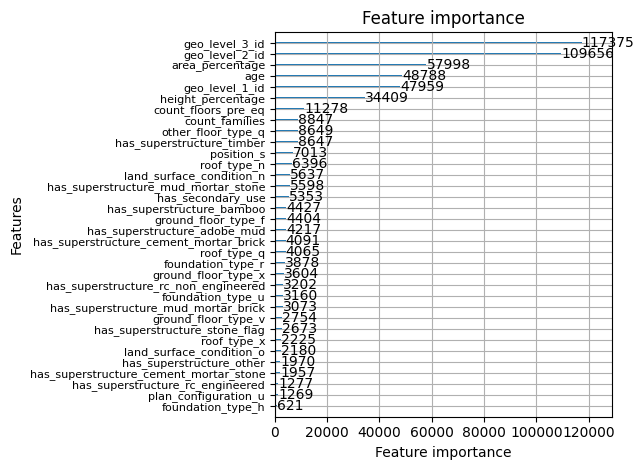

In [34]:
#1. Get the hyperparameters of the model and print them
params = model5.get_params()

print("Hyperparamters: ")
for key, value in params.items():
    print(key, ":", value)


# Save hyperparameters in a JSON
import json

with open('hyperparameters_model5.json', 'w') as f: # Make sure to change the name to match whatever model you are using
    json.dump(params, f)




#2. Plot bar plot of the feature importances to visualize the model
import lightgbm as lgb
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(80, 20), dpi=200)

# Plot the feature importance
ax = lgb.plot_importance(model5)

# Decrease the font size of the y-axis labels since there are two many features
for label in ax.get_yticklabels():
    label.set_size(8)

# Adjust the layout
plt.tight_layout()

# Save the plot
plt.savefig('feature_importance_model5.png') # Make sure to change the name to match whatever model you are using

# Show the plot
plt.show()

### Submitting Model 5

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Concatenate the datasets
full_X = pd.concat([train_X1, valid_X1, test_X1])
full_Y_temp = pd.concat([train_Y1_temp, valid_Y1_temp, test_Y1_temp])

# Refit the model on the full dataset
model5.fit(full_X, full_Y_temp)

# Save the model to a file using joblib
from joblib import dump
dump(model5, 'model5.joblib') # Make sure to change the name of the file to match up with the model number!


# # This is how to load the model from joblib
# from joblib import load
# model5 = load('model5.joblib')  # Make sure to change the name of the file to match up with the model number!

# Separate building_ids and features in the test data
competition_test_building_ids = test_data1['building_id']
competition_test_X = test_data1.drop('building_id', axis=1)

# Predict on the competition test data
competition_y_pred = model5.predict(competition_test_X)

# Since the competition expects labels in the range 1-3, add 1 to the predictions
competition_y_pred = competition_y_pred + 1

# Create a DataFrame for submission
submission = pd.DataFrame({
    'building_id': competition_test_building_ids,
    'damage_grade': competition_y_pred
})

# Save the submission DataFrame to a CSV file for submission
submission.to_csv('submission5_second.csv', index=False) # Make sure to change the name of the submission file to match up with the model number!
print("Successfully Submitted!")

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=3 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=3 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 746
[LightGBM] [Info] Number of data points in the train set: 260601, number of used features: 34
[LightGBM] [Info] Start training from score -2.339167
[LightGBM] [Info] Start training from score -0.564030
[LightGBM] [Info] Start training from score -1.094580
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=3 will be ignored. Current value: min_data_in_leaf=20
Successfully Submitted!


## For Model 6, try RandomSearchCV instead of GridSearchCV since GridSearchCV takes a long time

# 0. The competition is based on the micro averaged F1 score. Find a way to try and optimize this score during hyper parameter tuning, and make sure to make it clear that I should be looking at the scoring metric of every competition and making sure I optimize this scoring metric specifically when I do hyper parameter tuning and such, and not only focusing on accuracy
- Analyze confusion matrix and classification reports to understand model performance better.

### 1. Try other hyperparameter tuning libraries other than keras tuner, like optuna

### 2. Try XGBoost

### 3. Maybe go back and normalize the data since you decided to skip that step

### 4. Upload my notebook to ChatGPT Michael ML Tutor and ask it what else I can do to improve it as an ML engineer. turn this file into a python script and then copy and paste it into ChatGPT Michael ML Tutor 

### 5. Look into LightGBM GPU training and parallel training